In [32]:
import re
import pandas as pd
import os
import matplotlib.pyplot as plt
import netCDF4
import seaborn as sns
import numpy as np 

from netCDF4 import Dataset

In [2]:
print(os.getcwd())
dfSpaceWeather = pd.read_csv('Data\SpaceWeatherData_Cleaned', header = 0, delimiter=r"\s+")

C:\Users\heath\Documents\HeatherClasses\Practicum2


In [3]:
dfSpaceWeather.columns

Index(['yy', 'mm', 'dd', 'BSRN', 'ND', 'Kp', 'Kp.1', 'Kp.2', 'Kp.3', 'Kp.4',
       'Kp.5', 'Kp.6', 'Kp.7', 'Sum', 'Ap', 'Ap.1', 'Ap.2', 'Ap.3', 'Ap.4',
       'Ap.5', 'Ap.6', 'Ap.7', 'Avg', 'Cp', 'C9', 'ISN', 'F10.7', 'Q', 'Ctr81',
       'Lst81', 'F10.7.1', 'Ctr81.1', 'Lst81.1'],
      dtype='object')

In [4]:
#Rename columns to make sense 
dfSpaceWeather = dfSpaceWeather.rename(columns={
    "yy": "Year", 
    "mm": "Month", 
    "dd": "Day", 
    "BSRN": "BartelsSolarRotationNumber", 
    "ND": "NumberofDaywithintheBartels", 
    "Kp": "Kp_0000_0300", 
    "Kp.1": "Kp_0300_0600", 
    "Kp.2": "Kp_0600_0900", 
    "Kp.3": "Kp_0900_1200", 
    "Kp.4": "Kp_1200_1500",
    "Kp.5": "Kp_1500_1800",
    "Kp.6": "Kp_1800_2100",
    "Kp.7": "Kp_2100_0000",
    "Sum": "SumOfKps", 
    "Ap": "PlanetaryEquivalentAmplitude_0000_0300",
    "Ap.1": "PlanetaryEquivalentAmplitude_0300_0600",
    "Ap.2": "PlanetaryEquivalentAmplitude_0600_0900",
    "Ap.3": "PlanetaryEquivalentAmplitude_0900_1200",
    "Ap.4": "PlanetaryEquivalentAmplitude_1200_1500",
    "Ap.5": "PlanetaryEquivalentAmplitude_1500_1800",
    "Ap.6": "PlanetaryEquivalentAmplitude_1800_2100",
    "Ap.7": "PlanetaryEquivalentAmplitude_2100_0000",
    "Avg": "ArithmeticAverageof8Ap",
    "Cp": "PlanetaryDailyCharacterFigure", 
    "C9": "CpConversion", 
    "ISN": "InternationalSunspotNumber",
    "F10.7": "SoloarRadioFlux",
    "Q": "FluxQualifier",
    "Ctr81": "Centered81_dayArithmeticAverageofF10_7",
    "Lst81": "Last81DayArithmeticAverageofF10_7", 
    "F10.7.1": "ObservedValueOfF10_7",
    "Ctr81.1": "Centered81DayArithmeticAverageOfF10_7",
    "Lst81.1": "Last81DayArithmeticAverageOfF10_7"})

In [5]:
dfSpaceWeather.columns

Index(['Year', 'Month', 'Day', 'BartelsSolarRotationNumber',
       'NumberofDaywithintheBartels', 'Kp_0000_0300', 'Kp_0300_0600',
       'Kp_0600_0900', 'Kp_0900_1200', 'Kp_1200_1500', 'Kp_1500_1800',
       'Kp_1800_2100', 'Kp_2100_0000', 'SumOfKps',
       'PlanetaryEquivalentAmplitude_0000_0300',
       'PlanetaryEquivalentAmplitude_0300_0600',
       'PlanetaryEquivalentAmplitude_0600_0900',
       'PlanetaryEquivalentAmplitude_0900_1200',
       'PlanetaryEquivalentAmplitude_1200_1500',
       'PlanetaryEquivalentAmplitude_1500_1800',
       'PlanetaryEquivalentAmplitude_1800_2100',
       'PlanetaryEquivalentAmplitude_2100_0000', 'ArithmeticAverageof8Ap',
       'PlanetaryDailyCharacterFigure', 'CpConversion',
       'InternationalSunspotNumber', 'SoloarRadioFlux', 'FluxQualifier',
       'Centered81_dayArithmeticAverageofF10_7',
       'Last81DayArithmeticAverageofF10_7', 'ObservedValueOfF10_7',
       'Centered81DayArithmeticAverageOfF10_7',
       'Last81DayArithmeticAverageO

In [6]:
def myPlot(x,y):
    x = x
    y = y
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 15
    plt.rcParams["figure.figsize"] = fig_size
    plt.plot(x,y, color = 'green', linestyle='dashed', linewidth=3, marker='x', markerfacecolor = 'blue', markersize=10)

In [7]:
is_1957 = dfSpaceWeather['Year']==1957
df_1957 = dfSpaceWeather[is_1957]
is_Oct = df_1957['Month']==10
df_Oct1957 = df_1957[is_Oct]
df_Oct1957

,Year,Month,Day,BartelsSolarRotationNumber,NumberofDaywithintheBartels,Kp_0000_0300,Kp_0300_0600,Kp_0600_0900,Kp_0900_1200,Kp_1200_1500,...,PlanetaryDailyCharacterFigure,CpConversion,InternationalSunspotNumber,SoloarRadioFlux,FluxQualifier,Centered81_dayArithmeticAverageofF10_7,Last81DayArithmeticAverageofF10_7,ObservedValueOfF10_7,Centered81DayArithmeticAverageOfF10_7,Last81DayArithmeticAverageOfF10_7
0,1957,10,1,1700,19,43,40,30,20,37,...,1.1,5.0,236.0,268.0,0.0,265.2,230.6,269.3,266.6,230.9
1,1957,10,2,1700,20,37,37,17,17,27,...,0.7,3.0,234.0,252.0,0.0,266.0,231.4,253.3,267.4,231.7
2,1957,10,3,1700,21,27,20,13,33,37,...,1.0,5.0,242.0,265.0,0.0,266.7,232.3,266.3,268.1,232.7
3,1957,10,4,1700,22,30,30,23,27,23,...,0.7,3.0,217.0,237.0,0.0,267.4,232.9,238.2,268.8,233.3
4,1957,10,5,1700,23,30,30,17,23,20,...,0.6,3.0,219.0,245.0,0.0,267.8,233.5,246.2,269.3,233.9
5,1957,10,6,1700,24,17,3,10,7,0,...,0.0,0.0,227.0,250.0,0.0,268.1,233.9,251.2,269.6,234.3
6,1957,10,7,1700,25,10,20,17,17,17,...,0.2,1.0,234.0,253.0,0.0,268.4,234.2,254.3,269.9,234.6
7,1957,10,8,1700,26,17,0,10,7,3,...,0.0,0.0,244.0,261.0,0.0,268.2,234.7,262.6,269.8,235.2
8,1957,10,9,1700,27,3,17,23,17,23,...,0.4,2.0,267.0,275.0,0.0,268.3,235.2,276.6,270.0,235.7
9,1957,10,10,1701,1,30,40,40,30,23,...,1.0,5.0,264.0,275.0,0.0,268.2,235.6,276.6,269.8,236.1


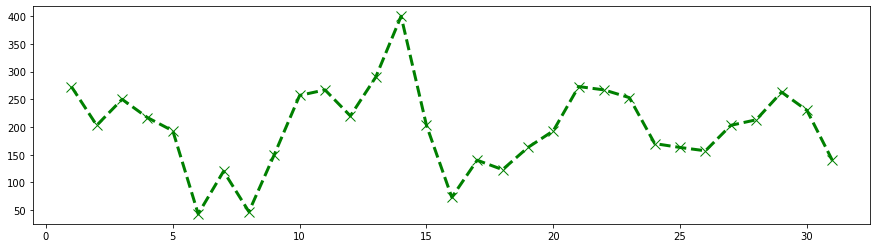

In [8]:
x = df_Oct1957.Day
y = df_Oct1957.SumOfKps
myPlot(x,y)

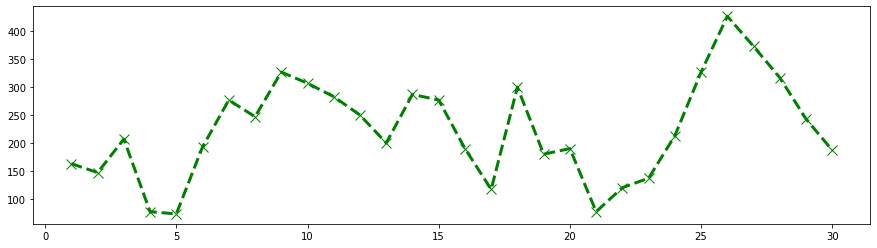

In [9]:
is_Nov = df_1957['Month']==11
df_Nov1957 = df_1957[is_Nov]
df_Nov1957
x_Nov1957 = df_Nov1957.Day
y_Nov1957 = df_Nov1957.SumOfKps
myPlot(x_Nov1957, y_Nov1957)

In [14]:
dfSpaceWeather.Year.unique()

array([1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

In [15]:
dfClimate = pd.read_csv('Data\Weather\MonthlyClimate.csv', header = 0, delimiter=r",")

In [17]:
dfClimate.columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'AWND',
       'AWND_ATTRIBUTES', 'CDSD', 'CDSD_ATTRIBUTES', 'CLDD', 'CLDD_ATTRIBUTES',
       'DP01', 'DP01_ATTRIBUTES', 'DP10', 'DP10_ATTRIBUTES', 'DT00',
       'DT00_ATTRIBUTES', 'DT32', 'DT32_ATTRIBUTES', 'DX32', 'DX32_ATTRIBUTES',
       'DX70', 'DX70_ATTRIBUTES', 'DX90', 'DX90_ATTRIBUTES', 'EMNT',
       'EMNT_ATTRIBUTES', 'EMXP', 'EMXP_ATTRIBUTES', 'EMXT', 'EMXT_ATTRIBUTES',
       'HDSD', 'HDSD_ATTRIBUTES', 'HTDD', 'HTDD_ATTRIBUTES', 'PRCP',
       'PRCP_ATTRIBUTES', 'SNOW', 'SNOW_ATTRIBUTES', 'TAVG', 'TAVG_ATTRIBUTES',
       'TMAX', 'TMAX_ATTRIBUTES', 'TMIN', 'TMIN_ATTRIBUTES', 'TSUN',
       'TSUN_ATTRIBUTES', 'WDF2', 'WDF2_ATTRIBUTES', 'WDF5', 'WDF5_ATTRIBUTES',
       'WSF2', 'WSF2_ATTRIBUTES', 'WSF5', 'WSF5_ATTRIBUTES'],
      dtype='object')

In [22]:
#Rename columns to make sense 
dfClimate = dfClimate.rename(columns={
    "EMXP": "ExtremeMaxPrecip",
    "EMXT": "ExtremeMaxTemp",
    "PRCP": "Precipitation",
    "DX90": "DaysMaxTempGT90F",
    "DP10": "DaysMoreThan1InchRain",
    "DX70": "DaysMaxTempGT70F",
    "EMNT": "ExtremeMinTemp",
    "DT32": "DaysMinTempLT32F",
    "WDF2": "DirFast2MinWind",
    "DX32": "DaysMaxTempLT32F",
    "WDF5": "DirFast5MinWind",
    "TMAX": "MaxTemp",
    "WSF2": "SpeedFast2MinWind",
    "WSF5": "SpeedFast5MinWind",
    "SNOW": "Snowfall",
    "HDSD": "HeatDegDaysSeasonToDate",
    "HTDD": "HeatDegDays",
    "DP01": "DaysWithGTTenthInchPrecip",
    "CDSD": "CoolDegDaysSeasonToDate",
    "DT00": "DaysMinTempLT0F",
    "AWND": "AverageWindSpeed",
    "CLDD": "CoolDegDays",
    "TAVG": "AverageTemp",
    "TMIN": "MinTemp",
    "TSUN": "TotalSunshinePeriod"})

In [24]:
dfClimate.columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE',
       'AverageWindSpeed', 'AWND_ATTRIBUTES', 'CoolDegDaysSeasonToDate',
       'CDSD_ATTRIBUTES', 'CoolDegDays', 'CLDD_ATTRIBUTES',
       'DaysWithGTTenthInchPrecip', 'DP01_ATTRIBUTES', 'DaysMoreThan1InchRain',
       'DP10_ATTRIBUTES', 'DaysMinTempLT0F', 'DT00_ATTRIBUTES',
       'DaysMinTempLT32F', 'DT32_ATTRIBUTES', 'DaysMaxTempLT32F',
       'DX32_ATTRIBUTES', 'DaysMaxTempGT70F', 'DX70_ATTRIBUTES',
       'DaysMaxTempGT90F', 'DX90_ATTRIBUTES', 'ExtremeMinTemp',
       'EMNT_ATTRIBUTES', 'ExtremeMaxPrecip', 'EMXP_ATTRIBUTES',
       'ExtremeMaxTemp', 'EMXT_ATTRIBUTES', 'HeatDegDaysSeasonToDate',
       'HDSD_ATTRIBUTES', 'HeatDegDays', 'HTDD_ATTRIBUTES', 'Precipitation',
       'PRCP_ATTRIBUTES', 'Snowfall', 'SNOW_ATTRIBUTES', 'AverageTemp',
       'TAVG_ATTRIBUTES', 'MaxTemp', 'TMAX_ATTRIBUTES', 'MinTemp',
       'TMIN_ATTRIBUTES', 'TotalSunshinePeriod', 'TSUN_ATTRIBUTES',
       'DirFast2MinWind', 'WDF2_ATTR

In [23]:
dfClimate.NAME.unique()

array(['LONDON CORBIN AIRPORT, KY US', 'JEROME CO AIRPORT, ID US',
       'SALINA MUNICIPAL AIRPORT, KS US',
       'GREENVILLE MAINE FORESTRY SERVICE, ME US', 'ANNAPOLIS NAF, MD US'],
      dtype=object)

In [25]:
dfClimate

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AverageWindSpeed,AWND_ATTRIBUTES,CoolDegDaysSeasonToDate,CDSD_ATTRIBUTES,...,TotalSunshinePeriod,TSUN_ATTRIBUTES,DirFast2MinWind,WDF2_ATTRIBUTES,DirFast5MinWind,WDF5_ATTRIBUTES,SpeedFast2MinWind,WSF2_ATTRIBUTES,SpeedFast5MinWind,WSF5_ATTRIBUTES
0,USW00003849,"LONDON CORBIN AIRPORT, KY US",37.08722,-84.07694,362.1,2000-01,6.7,",X",0.0,0,...,NaN,NaN,250.0,",X",190.0,",X",30.0,",X",43.0,",X"
1,USW00003849,"LONDON CORBIN AIRPORT, KY US",37.08722,-84.07694,362.1,2000-02,6.3,",X",0.0,0,...,NaN,NaN,260.0,",X",230.0,",X",29.1,",X",40.0,",X"
2,USW00003849,"LONDON CORBIN AIRPORT, KY US",37.08722,-84.07694,362.1,2000-03,5.8,",X",4.0,0,...,NaN,NaN,260.0,",X",260.0,",X",32.0,",X",40.0,",X"
3,USW00003849,"LONDON CORBIN AIRPORT, KY US",37.08722,-84.07694,362.1,2000-04,6.3,",X",4.0,0,...,NaN,NaN,280.0,",X",270.0,",X",38.0,",X",52.0,",X"
4,USW00003849,"LONDON CORBIN AIRPORT, KY US",37.08722,-84.07694,362.1,2000-05,5.6,",X",103.0,0,...,NaN,NaN,260.0,",X",270.0,",X",32.0,",X",39.0,",X"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,USW00013752,"ANNAPOLIS NAF, MD US",38.99130,-76.48910,1.8,2019-08,5.8,"2,W",NaN,NaN,...,NaN,NaN,350.0,",W",360.0,",W",25.9,",W",39.0,",W"
1100,USW00013752,"ANNAPOLIS NAF, MD US",38.99130,-76.48910,1.8,2019-09,6.5,"1,W",NaN,NaN,...,NaN,NaN,10.0,"1,W",10.0,"1,W",23.0,"1,W",29.0,"1,W"
1101,USW00013752,"ANNAPOLIS NAF, MD US",38.99130,-76.48910,1.8,2019-10,7.6,",W",NaN,NaN,...,NaN,NaN,300.0,",W",280.0,",W",29.1,",W",49.0,",W"
1102,USW00013752,"ANNAPOLIS NAF, MD US",38.99130,-76.48910,1.8,2019-11,6.9,"2,W",NaN,NaN,...,NaN,NaN,340.0,"2,W",340.0,"2,W",30.0,"2,W",44.0,"2,W"


In [26]:
dfClimate_StationIndex = dfClimate.set_index('STATION')
dfClimate_StationIndex

,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AverageWindSpeed,AWND_ATTRIBUTES,CoolDegDaysSeasonToDate,CDSD_ATTRIBUTES,CoolDegDays,...,TotalSunshinePeriod,TSUN_ATTRIBUTES,DirFast2MinWind,WDF2_ATTRIBUTES,DirFast5MinWind,WDF5_ATTRIBUTES,SpeedFast2MinWind,WSF2_ATTRIBUTES,SpeedFast5MinWind,WSF5_ATTRIBUTES
STATION,,,,,,,,,,,,,,,,,,,,,
USW00003849,"LONDON CORBIN AIRPORT, KY US",37.08722,-84.07694,362.1,2000-01,6.7,",X",0.0,0,0.0,...,NaN,NaN,250.0,",X",190.0,",X",30.0,",X",43.0,",X"
USW00003849,"LONDON CORBIN AIRPORT, KY US",37.08722,-84.07694,362.1,2000-02,6.3,",X",0.0,0,0.0,...,NaN,NaN,260.0,",X",230.0,",X",29.1,",X",40.0,",X"
USW00003849,"LONDON CORBIN AIRPORT, KY US",37.08722,-84.07694,362.1,2000-03,5.8,",X",4.0,0,4.0,...,NaN,NaN,260.0,",X",260.0,",X",32.0,",X",40.0,",X"
USW00003849,"LONDON CORBIN AIRPORT, KY US",37.08722,-84.07694,362.1,2000-04,6.3,",X",4.0,0,0.0,...,NaN,NaN,280.0,",X",270.0,",X",38.0,",X",52.0,",X"
USW00003849,"LONDON CORBIN AIRPORT, KY US",37.08722,-84.07694,362.1,2000-05,5.6,",X",103.0,0,98.0,...,NaN,NaN,260.0,",X",270.0,",X",32.0,",X",39.0,",X"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
USW00013752,"ANNAPOLIS NAF, MD US",38.99130,-76.48910,1.8,2019-08,5.8,"2,W",NaN,NaN,456.0,...,NaN,NaN,350.0,",W",360.0,",W",25.9,",W",39.0,",W"
USW00013752,"ANNAPOLIS NAF, MD US",38.99130,-76.48910,1.8,2019-09,6.5,"1,W",NaN,NaN,322.0,...,NaN,NaN,10.0,"1,W",10.0,"1,W",23.0,"1,W",29.0,"1,W"
USW00013752,"ANNAPOLIS NAF, MD US",38.99130,-76.48910,1.8,2019-10,7.6,",W",NaN,NaN,51.0,...,NaN,NaN,300.0,",W",280.0,",W",29.1,",W",49.0,",W"


In [49]:
def multiLinePlot(df, groupBy, x, y):
    fig, ax = plt.subplots(figsize=(14,10))
    for idx, gp in df.groupby(groupBy):
        gp.plot(x=x, y=y, ax=ax, label=idx)
        
    plt.show()

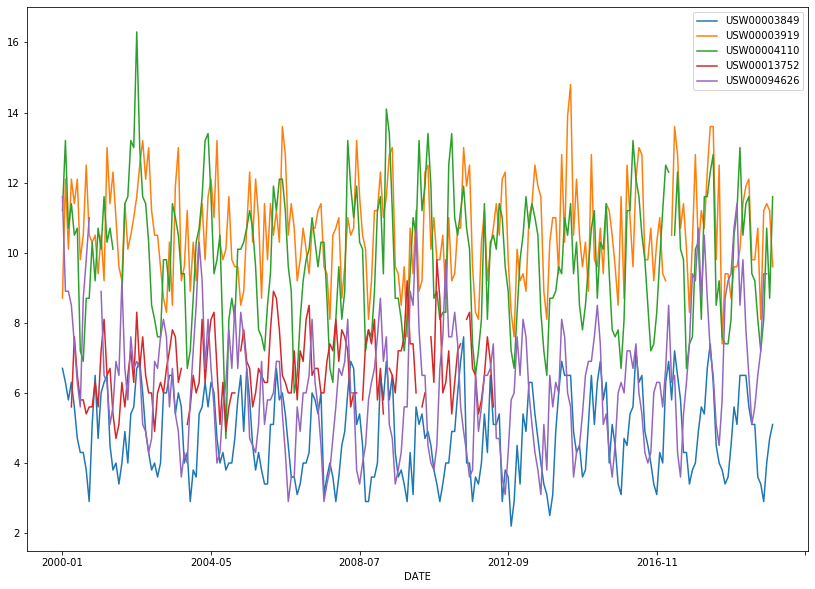

In [50]:
groupBy = 'STATION'
x = 'DATE'
y = 'AverageWindSpeed'
multiLinePlot(dfClimate_StationIndex, groupBy, x, y)

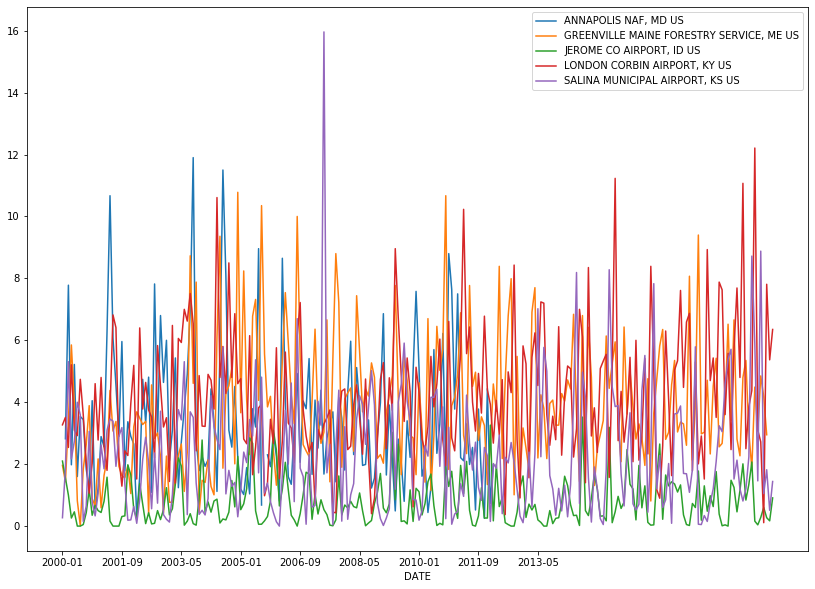

In [51]:
groupBy = 'NAME'
x = 'DATE'
y = 'Precipitation'
multiLinePlot(dfClimate_StationIndex, groupBy, x, y)

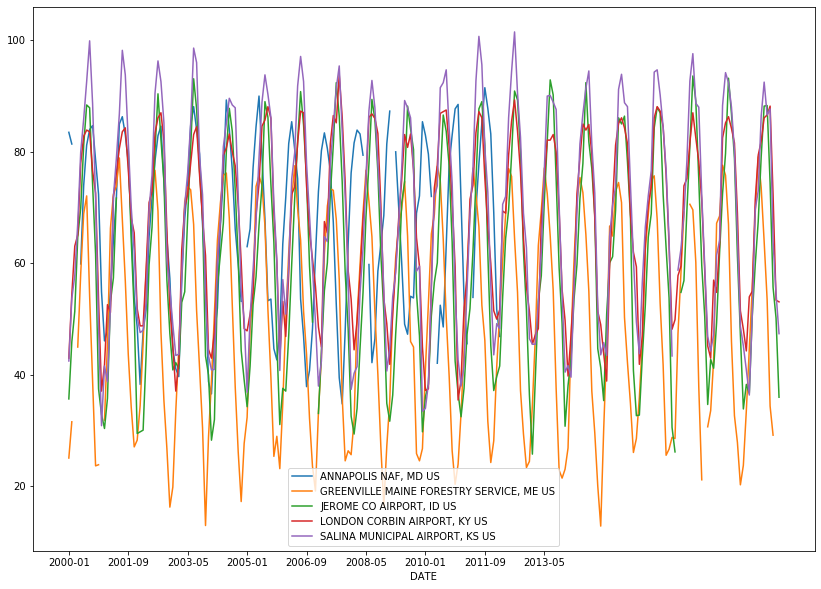

In [52]:
groupBy = 'NAME'
x = 'DATE'
y = 'MaxTemp'
multiLinePlot(dfClimate_StationIndex, groupBy, x, y)

In [65]:
#Create a new dataFrame for Space Weather
#Do average values for each month so we can correlate with the climate data 
dfSpaceWeatherAverage = dfSpaceWeather.groupby(['Year', 'Month'])['SumOfKps', 'ArithmeticAverageof8Ap', 'PlanetaryDailyCharacterFigure'].mean()
dfSpaceWeatherAverage

c:\users\heath\.conda\envs\opencv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


SumOfKps  ArithmeticAverageof8Ap  PlanetaryDailyCharacterFigure
Year Month                                                                   
1957 10     198.612903               13.774194                       0.683871
     11     223.766667               18.033333                       0.810000
     12     232.483871               17.741935                       0.841935
1958 1      208.387097               14.741935                       0.738710
     2      265.642857               26.857143                       0.978571
...                ...                     ...                            ...
2019 11      79.333333                4.200000                       0.156667
     12      67.419355                3.064516                       1.870968
2020 1       98.709677                4.806452                       5.935484
     2      126.206897                6.413793                       0.379310
     3      107.636364                4.818182                      15.181818

[750 rows x 3 columns]

In [70]:
spaceWeather_dict = dfSpaceWeather.groupby(['Year','Month']).agg({
    'SumOfKps': 'mean',
    'ArithmeticAverageof8Ap': 'mean',
    'PlanetaryDailyCharacterFigure': 'mean',
    'NumberofDaywithintheBartels' : 'mean',
    'PlanetaryDailyCharacterFigure' : 'mean',
    'CpConversion' : 'mean',
    'InternationalSunspotNumber' : 'mean',
    'SoloarRadioFlux' : 'mean',
    'FluxQualifier' : 'mean',
    'Centered81_dayArithmeticAverageofF10_7' : 'mean',
    'Last81DayArithmeticAverageofF10_7' : 'mean',
    'ObservedValueOfF10_7' : 'mean',
    'Centered81DayArithmeticAverageOfF10_7' : 'mean',
    'Last81DayArithmeticAverageOfF10_7' : 'mean'
})
spaceWeather_dict

SumOfKps  ArithmeticAverageof8Ap  PlanetaryDailyCharacterFigure  \
Year Month                                                                      
1957 10     198.612903               13.774194                       0.683871   
     11     223.766667               18.033333                       0.810000   
     12     232.483871               17.741935                       0.841935   
1958 1      208.387097               14.741935                       0.738710   
     2      265.642857               26.857143                       0.978571   
...                ...                     ...                            ...   
2019 11      79.333333                4.200000                       0.156667   
     12      67.419355                3.064516                       1.870968   
2020 1       98.709677                4.806452                       5.935484   
     2      126.206897                6.413793                       0.379310   
     3      107.636364                4.818182                      15.181818   

            NumberofDaywithintheBartels  CpConversion  \
Year Month                                              
1957 10                       14.838710      3.225806   
     11                       15.000000      3.700000   
     12                       14.000000      3.903226   
1958 1                        12.774194      3.354839   
     2                        13.750000      4.500000   
...                                 ...           ...   
2019 11                       14.200000      0.566667   
     12                       14.709677     70.967742   
2020 1                        15.225806     72.322581   
     2                        14.862069     71.034483   
     3                         6.000000     57.181818   

            InternationalSunspotNumber  SoloarRadioFlux  FluxQualifier  \
Year Month                                                               
1957 10                     253.806452       281.225806       0.000000   
     11                     210.866667       256.100000       0.000000   
     12                     239.419355       284.322581       0.129032   
1958 1                      202.451613       247.870968       0.000000   
     2                      164.928571       209.857143       0.142857   
...                                ...              ...            ...   
2019 11                       0.500000        68.663333       0.000000   
     12                       0.000000        70.593548      68.380645   
2020 1                        0.000000        71.490323      70.090323   
     2                        0.000000        71.275862      71.362069   
     3                       12.909091        71.163636      71.581818   

            Centered81_dayArithmeticAverageofF10_7  \
Year Month                                           
1957 10                                 269.212903   
     11                                 270.756667   
     12                                 268.045161   
1958 1                                  251.338710   
     2                                  233.932143   
...                                            ...   
2019 11                                  68.796667   
     12                                  73.248387   
2020 1                                   74.709677   
     2                                   72.800000   
     3                                   71.172727   

            Last81DayArithmeticAverageofF10_7  ObservedValueOfF10_7  \
Year Month                                                            
1957 10                            241.138710            283.109677   
     11                            266.740000            259.216667   
     12                            269.800000            289.358065   
1958 1                             271.277419            251.506452   
     2                             257.303571            211.796429   
...                                       ...          

In [93]:
dfSpaceWeatherAverage = pd.DataFrame(spaceWeather_dict)
dfClimate[['Year','Month']] = dfClimate['DATE'].str.split('-',expand=True)
dfClimate_DateIndex = pd.DataFrame(dfClimate.set_index(['Year','Month']))
dfClimate_DateIndex

STATION                          NAME  LATITUDE  LONGITUDE  \
Year Month                                                                   
2000 01     USW00003849  LONDON CORBIN AIRPORT, KY US  37.08722  -84.07694   
     02     USW00003849  LONDON CORBIN AIRPORT, KY US  37.08722  -84.07694   
     03     USW00003849  LONDON CORBIN AIRPORT, KY US  37.08722  -84.07694   
     04     USW00003849  LONDON CORBIN AIRPORT, KY US  37.08722  -84.07694   
     05     USW00003849  LONDON CORBIN AIRPORT, KY US  37.08722  -84.07694   
...                 ...                           ...       ...        ...   
2019 08     USW00013752          ANNAPOLIS NAF, MD US  38.99130  -76.48910   
     09     USW00013752          ANNAPOLIS NAF, MD US  38.99130  -76.48910   
     10     USW00013752          ANNAPOLIS NAF, MD US  38.99130  -76.48910   
     11     USW00013752          ANNAPOLIS NAF, MD US  38.99130  -76.48910   
     12     USW00013752          ANNAPOLIS NAF, MD US  38.99130  -76.48910   

            ELEVATION     DATE  AverageWindSpeed AWND_ATTRIBUTES  \
Year Month                                                         
2000 01         362.1  2000-01               6.7              ,X   
     02         362.1  2000-02               6.3              ,X   
     03         362.1  2000-03               5.8              ,X   
     04         362.1  2000-04               6.3              ,X   
     05         362.1  2000-05               5.6              ,X   
...               ...      ...               ...             ...   
2019 08           1.8  2019-08               5.8             2,W   
     09           1.8  2019-09               6.5             1,W   
     10           1.8  2019-10               7.6              ,W   
     11           1.8  2019-11               6.9             2,W   
     12           1.8  2019-12               5.6              ,W   

            CoolDegDaysSeasonToDate CDSD_ATTRIBUTES  ...  TotalSunshinePeriod  \
Year Month                                           ...                        
2000 01                         0.0               0  ...                  NaN   
     02                         0.0               0  ...                  NaN   
     03                         4.0               0  ...                  NaN   
     04                         4.0               0  ...                  NaN   
     05                       103.0               0  ...                  NaN   
...                             ...             ...  ...                  ...   
2019 08                         NaN             NaN  ...                  NaN   
     09                         NaN             NaN  ...                  NaN   
     10                         NaN             NaN  ...                  NaN   
     11                         NaN             NaN  ...                  NaN   
     12                         NaN             NaN  ...                  NaN   

           TSUN_ATTRIBUTES  DirFast2MinWind WDF2_ATTRIBUTES  DirFast5MinWind  \
Year Month                                                                     
2000 01                NaN            250.0              ,X            190.0   
     02                NaN            260.0              ,X            230.0   
     03                NaN            260.0              ,X            260.0   
     04                NaN            280.0              ,X            270.0   
     05                NaN            260.0              ,X            270.0   
...                    ...              ...             ...              ...   
2019 08                NaN            350.0              ,W            360.0   
     09                NaN             10.0             1,W             10.0   
     10                NaN            300.0              ,W            280.0   
     11                NaN            340.0             2,W            340.0   
     12                NaN            330.0              ,W            280.0   

           WDF5_ATTRI

In [94]:
dfClimate_DateIndex.columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE',
       'AverageWindSpeed', 'AWND_ATTRIBUTES', 'CoolDegDaysSeasonToDate',
       'CDSD_ATTRIBUTES', 'CoolDegDays', 'CLDD_ATTRIBUTES',
       'DaysWithGTTenthInchPrecip', 'DP01_ATTRIBUTES', 'DaysMoreThan1InchRain',
       'DP10_ATTRIBUTES', 'DaysMinTempLT0F', 'DT00_ATTRIBUTES',
       'DaysMinTempLT32F', 'DT32_ATTRIBUTES', 'DaysMaxTempLT32F',
       'DX32_ATTRIBUTES', 'DaysMaxTempGT70F', 'DX70_ATTRIBUTES',
       'DaysMaxTempGT90F', 'DX90_ATTRIBUTES', 'ExtremeMinTemp',
       'EMNT_ATTRIBUTES', 'ExtremeMaxPrecip', 'EMXP_ATTRIBUTES',
       'ExtremeMaxTemp', 'EMXT_ATTRIBUTES', 'HeatDegDaysSeasonToDate',
       'HDSD_ATTRIBUTES', 'HeatDegDays', 'HTDD_ATTRIBUTES', 'Precipitation',
       'PRCP_ATTRIBUTES', 'Snowfall', 'SNOW_ATTRIBUTES', 'AverageTemp',
       'TAVG_ATTRIBUTES', 'MaxTemp', 'TMAX_ATTRIBUTES', 'MinTemp',
       'TMIN_ATTRIBUTES', 'TotalSunshinePeriod', 'TSUN_ATTRIBUTES',
       'DirFast2MinWind', 'WDF2_ATTR